In [1]:
# imports 
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
# reading in files 
transaction_dataset = pd.read_csv('datasets/bs140513_032310.csv')
network_dataset = pd.read_csv('datasets/bsNET140513_032310.csv')

In [3]:
transaction_dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
# changing columns to proper type 
def remove_quotations(x):
    return x.strip("''")


def age_null(x):
    if x == 'U':
        return -1 # return -1 if undefined 
    return x 

def gender_switch(x):
    if x == 'M':
        return 0
    if x == 'F':
        return 1

transaction_dataset['customer'] = transaction_dataset['customer'].apply(remove_quotations)
transaction_dataset['age'] = transaction_dataset['age'].apply(remove_quotations).apply(age_null)
transaction_dataset['gender'] = transaction_dataset['gender'].apply(remove_quotations).apply(gender_switch)
transaction_dataset['zipcodeOri'] = transaction_dataset['zipcodeOri'].apply(remove_quotations).astype(int)
transaction_dataset['merchant'] = transaction_dataset['merchant'].apply(remove_quotations)
transaction_dataset['zipMerchant'] = transaction_dataset['zipMerchant'].apply(remove_quotations).astype(int)
transaction_dataset['category'] = transaction_dataset['category'].apply(remove_quotations)

In [5]:
transaction_dataset.shape

(594643, 10)

In [6]:
transaction_dataset.describe()

,step,gender,zipcodeOri,zipMerchant,amount,fraud
count,594643.000000,592950.000000,594643.0,594643.0,594643.000000,594643.000000
mean,94.986827,0.547373,28007.0,28007.0,37.890135,0.012108
std,51.053632,0.497751,0.0,0.0,111.402831,0.109369
min,0.000000,0.000000,28007.0,28007.0,0.000000,0.000000
25%,52.000000,0.000000,28007.0,28007.0,13.740000,0.000000
50%,97.000000,1.000000,28007.0,28007.0,26.900000,0.000000
75%,139.000000,1.000000,28007.0,28007.0,42.540000,0.000000
max,179.000000,1.000000,28007.0,28007.0,8329.960000,1.000000


__Step__: Everything checks out with step, spread is correct and it seems like the data is relatively equallly spread out (mean and median are almost equal). 

__Gender__: Note that gender is the one variable that is missing some data. In general the data seems to be equally distributed (with some more females than males). 

__zipcodeOri__: Zipcode is all the exact same so we can remove it. 

__zipMerchant__: Zipcode is all the exact same so we can remove it. 

__amount__: The amounts are generally skewed to the right which means that heavier transactions tend to occur in this dataset.  

__fraud__: As mentioned from the description, a majority of this data is not fraudulent, which is evident by mean/50%. 

In [7]:
transaction_dataset_modded = transaction_dataset.drop(['zipcodeOri', 'zipMerchant'], axis=1)

In [8]:
transaction_dataset_modded.head() 

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,0.0,M348934600,es_transportation,4.55,0
1,0,C352968107,2,0.0,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,1.0,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,0.0,M348934600,es_transportation,17.25,0
4,0,C757503768,5,0.0,M348934600,es_transportation,35.72,0


In [9]:
not_fraud = transaction_dataset_modded[transaction_dataset_modded['fraud'] == 0]
not_fraud.describe()

,step,gender,amount,fraud
count,587443.000000,585757.000000,587443.000000,587443.0
mean,95.054077,0.545972,31.847230,0.0
std,51.038755,0.497883,31.470876,0.0
min,0.000000,0.000000,0.000000,0.0
25%,52.000000,0.000000,13.590000,0.0
50%,97.000000,1.000000,26.610000,0.0
75%,139.000000,1.000000,41.895000,0.0
max,179.000000,1.000000,2144.860000,0.0


In [10]:
fraud = transaction_dataset_modded[transaction_dataset_modded['fraud'] == 1]
fraud.describe() 

,step,gender,amount,fraud
count,7200.000000,7193.000000,7200.000000,7200.0
mean,89.500000,0.661476,530.926551,1.0
std,51.964331,0.473240,835.587112,0.0
min,0.000000,0.000000,0.030000,1.0
25%,44.750000,0.000000,159.980000,1.0
50%,89.500000,1.000000,319.175000,1.0
75%,134.250000,1.000000,548.977500,1.0
max,179.000000,1.000000,8329.960000,1.0


The biggest difference is that the gender of those who commit fraud tend to be male and the amount tends to be larger amounts.

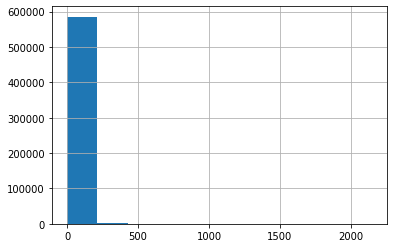

In [11]:
not_fraud['amount'].hist()

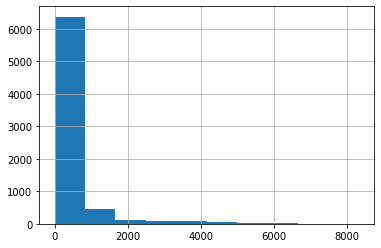

In [12]:
fraud['amount'].hist()

Maybe divide it up into different categories and then test differences. Divide using one hot encoding.

In [13]:
network_dataset.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [14]:
network_dataset['Source'] = network_dataset['Source'].apply(remove_quotations)
network_dataset['Target'] = network_dataset['Target'].apply(remove_quotations)
network_dataset['typeTrans'] = network_dataset['typeTrans'].apply(remove_quotations)

In [15]:
network_dataset.head() 

,Source,Target,Weight,typeTrans,fraud
0,C1093826151,M348934600,4.55,es_transportation,0
1,C352968107,M348934600,39.68,es_transportation,0
2,C2054744914,M1823072687,26.89,es_transportation,0
3,C1760612790,M348934600,17.25,es_transportation,0
4,C757503768,M348934600,35.72,es_transportation,0


By the looks of it this dataset only provides additional information about the weight of the package. 

In [18]:
merged_df = pd.merge(transaction_dataset_modded,network_dataset, how = 'outer',
                     left_on = ['customer','merchant'], right_on = ['Source','Target'])
merged_df.head()

,step,customer,age,gender,merchant,category,amount,fraud_x,Source,Target,Weight,typeTrans,fraud_y
0,0,C1093826151,4,0.0,M348934600,es_transportation,4.55,0,C1093826151,M348934600,4.55,es_transportation,0
1,0,C1093826151,4,0.0,M348934600,es_transportation,4.55,0,C1093826151,M348934600,37.21,es_transportation,0
2,0,C1093826151,4,0.0,M348934600,es_transportation,4.55,0,C1093826151,M348934600,31.63,es_transportation,0
3,0,C1093826151,4,0.0,M348934600,es_transportation,4.55,0,C1093826151,M348934600,35.86,es_transportation,0
4,0,C1093826151,4,0.0,M348934600,es_transportation,4.55,0,C1093826151,M348934600,39.58,es_transportation,0


In [20]:
merged_df = merged_df.drop(['Source','Target','typeTrans','fraud_y'],axis=1)

In [21]:
# not sure if this merge is necessary or correct

In [ ]:
# difference in buying activity for each customer, number of transactions per customer, percentage of fraudalant transactions ,
